<a href="https://colab.research.google.com/github/Sriharshitha842/ML_LAB/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMAGE CLASSIFICATION USING ANN**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [ ]:
print(f"Tensorflow Version: {tf.__version__}")

Tensorflow Version: 2.8.2


In [ ]:
# load the datasets from fashion_mnist into training and testing datasets
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape:  {x_test.shape}")
print(f"y_test shape:  {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [ ]:
# see the maximum, minimum, and mean values in x_train
print(f"x_train Max Value:  {np.max(x_train)}")
print(f"x_train Min Value:  {np.min(x_train)}")
print(f"x_train Mean Value: {np.mean(x_train):.1f}")

x_train Max Value:  255
x_train Min Value:  0
x_train Mean Value: 72.9


In [ ]:
# see the maximum and minimum values in y_train
print(f"y_train Max Value:  {np.max(y_train)}")
print(f"y_train Min Value:  {np.min(y_train)}")

y_train Max Value:  9
y_train Min Value:  0


In [ ]:
# define the classes as a list
class_names = ['0 Top/T-Shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat',
               '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

**Data Exploration**

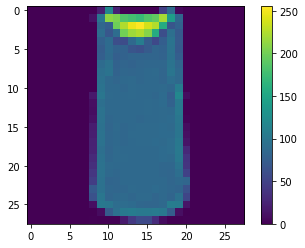

In [ ]:
#first image in x_train
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.show()

In [ ]:
# show the label for the first image in x_train
print(f"x_train[2] = {class_names[y_train[2]]}")

x_train[2] = 0 Top/T-Shirt


**Normalize the dataset**

In [ ]:
# this helps the neural network learn faster
x_train = x_train / 255.0
x_test = x_test / 255.0

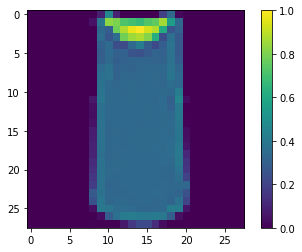

In [ ]:
# show the image after it has been normalized
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.show()

**Flatten the model**

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# -1 selects all images in the dataset
# 28*28 converts the 2D 28 x 28 dimension into a 1D dimension

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

**Build a model**

In [ ]:
# define an object
model = tf.keras.models.Sequential()

# adding the first fully connected hidden layer parameters:
# 1) units (number of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = 784 entered as (784,)
model.add(tf.keras.layers.Dense(units=300, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=100, activation="relu"))


# adding the second layer with dropout
# dropout: a regularization technique where randomly selected neurons will be ignored during training to prevent overfitting
model.add(tf.keras.layers.Dropout(rate=0.3))

# adding the output layer parameters:
# 1) units (neurons) = 10  
# 2) activation = softmax     
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
np.random.seed(0)

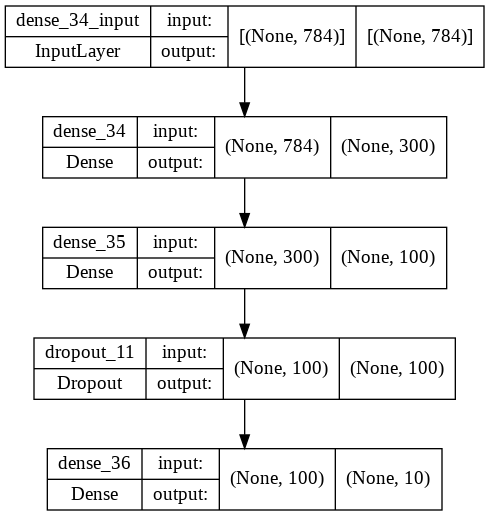

In [ ]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)


**Train the model**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 300)               235500    
                                                                 
 dense_35 (Dense)            (None, 100)               30100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_36 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# begin training the model
model.fit(x_train, y_train, batch_size=32,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1609 - sparse_categorical_accuracy: 0.9376
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1611 - sparse_categorical_accuracy: 0.9374
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1565 - sparse_categorical_accuracy: 0.9394
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1582 - sparse_categorical_accuracy: 0.9386
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1535 - sparse_categorical_accuracy: 0.9401
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1518 - sparse_categorical_accuracy: 0.9399
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1485 - sparse_categorical_accuracy: 0.9427
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1494 - sparse_categorical_accuracy: 0.9420
Epoch 9/30
1875/1875 [==========

**Model Evalution**

In [ ]:
# use the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# print the accuracy and loss
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.5920 - sparse_categorical_accuracy: 0.8908
Test Accuracy: 0.8908
Test Loss: 0.5920


**Model Prediction**

In [ ]:
# predictions
y_Pred=model.predict(x_test) 
y_pred=np.argmax(y_Pred,axis=1)

In [ ]:
# print the predicted class and actual class
print(f"y_pred[0] = {class_names[4]}")
print(f"y_test[0] = {class_names[4]}")

y_pred[0] = 4 Coat
y_test[0] = 4 Coat


**Confusion Matrix**

In [ ]:
label_names = ['Top/T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cm = confusion_matrix(y_test, y_pred)

nr_rows = cm.shape[0]
nr_cols = cm.shape[1]

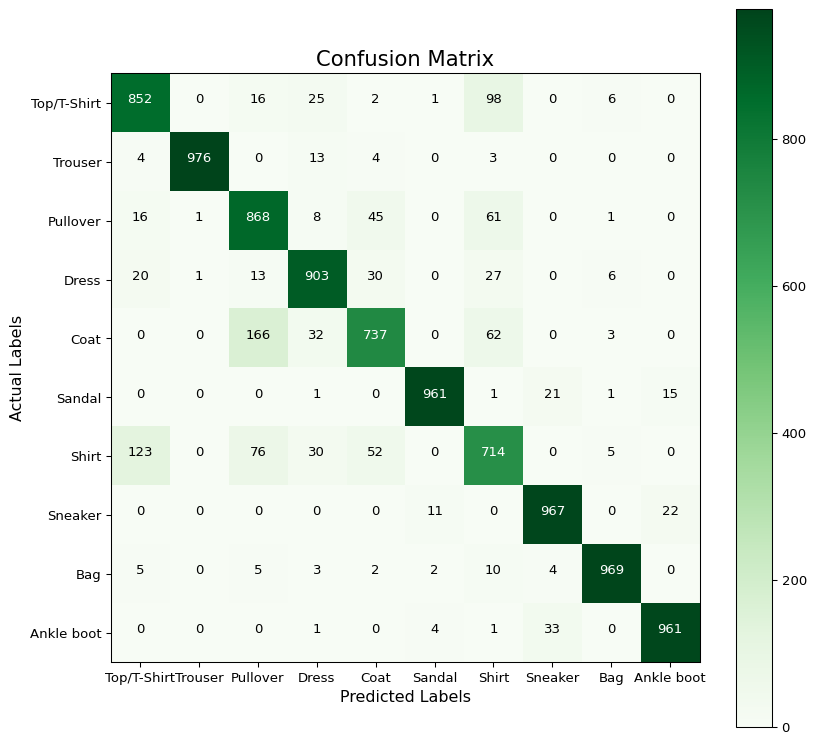

In [ ]:
plt.figure(figsize=(10,10), dpi=95)
plt.imshow(cm, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, label_names)
plt.xticks(tick_marks, label_names)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
            color='white' if cm[i, j] > cm.max()/2 else 'black')
    

plt.show()

In [ ]:
# print the accuracy
acc_cm = accuracy_score(y_test, y_pred)
print(f"Accuracy = {acc_cm * 100}%")

Accuracy = 89.08%


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       1.00      0.98      0.99      1000
           2       0.76      0.87      0.81      1000
           3       0.89      0.90      0.90      1000
           4       0.85      0.74      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.71      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

